# Aaron Kohn
## Final Project
## Education Data

In [1]:
import pandas as pd
import sqlite3
import re

In [2]:
ratings_df = pd.read_csv('city.csv', index_col=0)
ratings_df.reset_index(inplace=True)
ratings_df.drop('index', axis=1, inplace= True)
ratings_df

,Borough,School_Num,School_Year,Indicator_1.1,Indicator_1.2,Indicator_2.2,Indicator_3.4,Indicator_4.2
0,M,307,2005-06,3.0,3.0,4.0,4.0,4.0
1,M,459,2005-06,3.0,3.0,3.0,4.0,3.0
2,M,560,2005-06,4.0,4.0,4.0,4.0,4.0
3,M,294,2005-06,4.0,4.0,4.0,4.0,4.0
4,M,299,2005-06,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
9003,K,618,2019-20,3.0,2.0,2.0,3.0,2.0
9004,Q,244,2019-20,4.0,4.0,4.0,4.0,4.0
9005,Q,317,2019-20,4.0,4.0,3.0,4.0,3.0
9006,K,059,2019-20,4.0,3.0,4.0,4.0,3.0


In [3]:
columns = [cols.replace(r'.', '_') for cols in ratings_df.columns]
ratings_df.columns = columns
ratings_df.head()

,Borough,School_Num,School_Year,Indicator_1_1,Indicator_1_2,Indicator_2_2,Indicator_3_4,Indicator_4_2
0,M,307,2005-06,3.0,3.0,4.0,4.0,4.0
1,M,459,2005-06,3.0,3.0,3.0,4.0,3.0
2,M,560,2005-06,4.0,4.0,4.0,4.0,4.0
3,M,294,2005-06,4.0,4.0,4.0,4.0,4.0
4,M,299,2005-06,3.0,3.0,3.0,3.0,3.0


In [4]:
PS_df = pd.read_csv('merged_df', index_col=0)
PS_df.reset_index(inplace=True)
PS_df.drop('index', axis=1, inplace= True)
PS_df.head()

,Borough,SchoolNumber,School Name,Neighborhood,School name_num,similarity,Legal Name,INST Type Description,INST Sub Type Description,County Code,...,Grade 5,Grade 6,Grade Ungraded Elementary,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Grade Ungraded Secondary
0,Manhattan,PS 1,alfred f. smith,Two Bridges,ps 1 alfred f. smith,95,ps 1 alfred e smith,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,N,N,N,N,N,N,N,NaN
1,Manhattan,PS 11,william t. harris,Chelsea,ps 11 william t. harris,100,ps 11 william t harris,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,Y,N,N,N,N,N,N,NaN
2,Manhattan,PS 15,roberto clemente,East Village,ps 15 roberto clemente,100,ps 15 roberto clemente,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,Y,N,N,N,N,N,N,NaN
3,Manhattan,PS 18,park terrace,Inwood,ps 18 park terrace,100,ps 18 park terrace,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,Y,N,Y,Y,N,N,N,N,NaN
4,Manhattan,PS 19,asher levy,East Village,ps 19 asher levy,100,ps 19 asher levy,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,N,N,N,N,N,N,N,NaN


In [5]:
columns = [cols.replace(' ', '_').replace('Grade_Pre-K', 'Grade_Pre_K') for cols in PS_df.columns]
PS_df.columns = columns

In [6]:
PS_df['Borough'].unique()

array(['Manhattan', 'Region 9: Manhattan, the Bronx[edit]',
       'Region 4: Queens[edit]', 'Region 5: Brooklyn, Queens[edit]',
       'Region 8: Brooklyn[edit]',
       'Special Education District 75: citywide[edit]',
       'Region 1: The Bronx[edit]', 'Region 3: Queens[edit]',
       'Region 2: The Bronx[edit]',
       'Region 7: Staten Island, Brooklyn[edit]',
       'Empowerment Schools: citywide[edit]', 'Region 6: Brooklyn[edit]',
       'Region 10: Manhattan, the Bronx[edit]'], dtype=object)

In [7]:
PS_df['County_Description'].unique()

array(['NEW YORK', 'BRONX', 'QUEENS', 'KINGS', 'RICHMOND'], dtype=object)

In [8]:

PS_df['borough2'] = PS_df['County_Description'].apply(lambda x: x.replace("NEW YORK", "M").replace("QUEENS", "Q").
                                          replace('RICHMOND', 'R').replace('KINGS', 'K').replace('BRONX', 'X'))
boro = []
for i in range(len(PS_df['borough2'])):
    n = re.findall('[MQRKX]', PS_df['borough2'][i])
#     print(n, PS_df['borough'][i])
    if n == []:
        n = ["other"]
    boro.append(n[0])
PS_df['borough2'] = boro
    
PS_df['borough2'].unique()
# PS_df.drop('Borough', axis= 1, inplace= True)


array(['M', 'X', 'Q', 'K', 'R'], dtype=object)

In [9]:

PS_df['school_num'] = PS_df['SchoolNumber'].apply(lambda x : re.findall('[0-9]+', x)[-1])

In [10]:
PS_df.drop_duplicates(subset=('borough2', 'school_num'), keep= False, inplace=True)

In [11]:
PS_df.head()

,Borough,SchoolNumber,School_Name,Neighborhood,School_name_num,similarity,Legal_Name,INST_Type_Description,INST_Sub_Type_Description,County_Code,...,Grade_Ungraded_Elementary,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12,Grade_Ungraded_Secondary,borough2,school_num
0,Manhattan,PS 1,alfred f. smith,Two Bridges,ps 1 alfred f. smith,95,ps 1 alfred e smith,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,N,N,N,N,N,N,N,NaN,M,1
1,Manhattan,PS 11,william t. harris,Chelsea,ps 11 william t. harris,100,ps 11 william t harris,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,N,N,N,N,N,NaN,M,11
2,Manhattan,PS 15,roberto clemente,East Village,ps 15 roberto clemente,100,ps 15 roberto clemente,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,Y,N,N,N,N,N,N,NaN,M,15
3,Manhattan,PS 18,park terrace,Inwood,ps 18 park terrace,100,ps 18 park terrace,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,N,Y,Y,N,N,N,N,NaN,M,18
4,Manhattan,PS 19,asher levy,East Village,ps 19 asher levy,100,ps 19 asher levy,PUBLIC SCHOOLS,PUBLIC SCHOOL CITY,31,...,N,N,N,N,N,N,N,NaN,M,19


In [12]:
enrollment_df = pd.read_csv('enrollment.csv', index_col=0)
enrollment_df.reset_index(inplace=True)
enrollment_df.drop('index',axis= 1,inplace=True)
enrollment_df['school_num'] = enrollment_df['school_num'].astype('object')
enrollment_df.head()

,dbn,school_name,year,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,...,students_with_disabilities_#,students_with_disabilities_%,english_language_learners_#,english_language_learners_%,poverty_#,poverty_%,economic_need_index,district,borough,school_num
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,65,34.2,19,10.0,171,90.0,93.5,1,M,15
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,64,35.0,17,9.3,169,92.3,93.5,1,M,15
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,60,34.1,16,9.1,149,84.7,89.6,1,M,15
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,51,28.7,12,6.7,152,85.4,89.2,1,M,15
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,45,23.7,8,4.2,161,84.7,89.0,1,M,15


In [13]:
columns = [cols.replace(r'#', 'count').replace(r'%', 'percent') for cols in enrollment_df.columns]
enrollment_df.columns = columns
enrollment_df.head()

,dbn,school_name,year,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,...,students_with_disabilities_count,students_with_disabilities_percent,english_language_learners_count,english_language_learners_percent,poverty_count,poverty_percent,economic_need_index,district,borough,school_num
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,65,34.2,19,10.0,171,90.0,93.5,1,M,15
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,64,35.0,17,9.3,169,92.3,93.5,1,M,15
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,60,34.1,16,9.1,149,84.7,89.6,1,M,15
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,51,28.7,12,6.7,152,85.4,89.2,1,M,15
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,45,23.7,8,4.2,161,84.7,89.0,1,M,15


In [14]:
cols = []
for col in PS_df.columns:
    cols.append((col, str(PS_df[col].dtype).upper()))
print(len(cols))
stri = 'CREATE TABLE IF NOT EXISTS  schools('
for i in range(len(cols)):
    stri = stri + f' {cols[i][0]} {cols[i][1]},'
stri = stri + ' PRIMARY KEY(borough2, school_num))'   
stri

36


'CREATE TABLE IF NOT EXISTS  schools( Borough OBJECT, SchoolNumber OBJECT, School_Name OBJECT, Neighborhood OBJECT, School_name_num OBJECT, similarity INT64, Legal_Name OBJECT, INST_Type_Description OBJECT, INST_Sub_Type_Description OBJECT, County_Code INT64, County_Description OBJECT, Physical_City OBJECT, CEO_Salutation OBJECT, CEO_FName OBJECT, CEO_LName OBJECT, CEO_Title OBJECT, Grade_Organization_Description OBJECT, Grade_Pre_K OBJECT, Grade_Half_K OBJECT, Grade_Full_K OBJECT, Grade_1 OBJECT, Grade_2 OBJECT, Grade_3 OBJECT, Grade_4 OBJECT, Grade_5 OBJECT, Grade_6 OBJECT, Grade_Ungraded_Elementary OBJECT, Grade_7 OBJECT, Grade_8 OBJECT, Grade_9 OBJECT, Grade_10 OBJECT, Grade_11 OBJECT, Grade_12 OBJECT, Grade_Ungraded_Secondary OBJECT, borough2 OBJECT, school_num OBJECT, PRIMARY KEY(borough2, school_num))'

In [15]:
with sqlite3.connect('Education3.db') as conn:
    cursor = conn.cursor()
    cursor.execute(stri)

In [16]:
with sqlite3.connect('Education3.db') as conn:
    PS_df.to_sql('schools', con=conn, index=False, if_exists='append')

In [17]:
for x in cursor.execute("SELECT * FROM schools LIMIT 1"):
    print(x)

('Manhattan', 'PS 1', 'alfred f. smith', 'Two Bridges', 'ps 1 alfred f. smith', 95, 'ps 1 alfred e smith', 'PUBLIC SCHOOLS', 'PUBLIC SCHOOL CITY', 31, 'NEW YORK', 'NEW YORK', 'MS.', 'AMY', 'HOM', 'PRINCIPAL', 'Elementary', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', None, 'M', 1)


In [18]:
cols = []
for col in ratings_df.columns:
    cols.append((col, str(ratings_df[col].dtype).upper()))
print(len(cols))
stri = 'CREATE TABLE IF NOT EXISTS  scores('
for i in range(len(cols)):
    stri = stri + f' {cols[i][0]} {cols[i][1]},'
stri = stri + ' FOREIGN KEY(borough, school_num) REFERENCES schools(borough2, schoolnumber))'   
stri

8


'CREATE TABLE IF NOT EXISTS  scores( Borough OBJECT, School_Num OBJECT, School_Year OBJECT, Indicator_1_1 FLOAT64, Indicator_1_2 FLOAT64, Indicator_2_2 FLOAT64, Indicator_3_4 FLOAT64, Indicator_4_2 FLOAT64, FOREIGN KEY(borough, school_num) REFERENCES schools(borough2, schoolnumber))'

In [19]:
with sqlite3.connect('Education3.db') as conn:
    cursor = conn.cursor()
    cursor.execute(stri)

In [20]:
with sqlite3.connect('Education3.db') as conn:
    ratings_df.to_sql('scores', con=conn, index=False, if_exists='append')

In [21]:
for x in cursor.execute("SELECT borough FROM scores LIMIT 3"):
    print(x)

('M',)
('M',)
('M',)


In [22]:
cols = []
for col in enrollment_df.columns:
    cols.append((col, str(enrollment_df[col].dtype).upper()))
print(len(cols))
stri = 'CREATE TABLE IF NOT EXISTS  enrollment('
for i in range(len(cols)):
    stri = stri + f' {cols[i][0]} {cols[i][1]},'
stri = stri + ' PRIMARY KEY(borough, school_num, year), \
FOREIGN KEY(borough, school_num) REFERENCES schools(borough2, schoolnumber), \
FOREIGN KEY(borough, school_num, year) REFERENCES scores(borough, schoolnumber, school_year)) '   
stri

42


'CREATE TABLE IF NOT EXISTS  enrollment( dbn OBJECT, school_name OBJECT, year OBJECT, total_enrollment INT64, grade_pk_all INT64, grade_k INT64, grade_1 INT64, grade_2 INT64, grade_3 INT64, grade_4 INT64, grade_5 INT64, grade_6 INT64, grade_7 INT64, grade_8 INT64, grade_9 INT64, grade_10 INT64, grade_11 INT64, grade_12 INT64, female_count INT64, female_percent FLOAT64, male_count INT64, male_percent FLOAT64, asian_count INT64, asian_percent FLOAT64, black_count INT64, black_percent FLOAT64, hispanic_count INT64, hispanic_percent FLOAT64, multiple_race_categories_not_represented_count INT64, multiple_race_categories_not_represented_percent FLOAT64, white_count INT64, white_percent FLOAT64, students_with_disabilities_count INT64, students_with_disabilities_percent FLOAT64, english_language_learners_count INT64, english_language_learners_percent FLOAT64, poverty_count INT64, poverty_percent FLOAT64, economic_need_index FLOAT64, district INT64, borough OBJECT, school_num OBJECT, PRIMARY KE

In [23]:
with sqlite3.connect('Education3.db') as conn:
    cursor = conn.cursor()
    cursor.execute(stri)

In [24]:
with sqlite3.connect('Education3.db') as conn:
    enrollment_df.to_sql('enrollment', con=conn, index=False, if_exists='append')

In [25]:
for x in cursor.execute("SELECT school_num FROM enrollment LIMIT 5"):
    print(x)

(1,)
(1,)
(1,)
(1,)
(1,)


In [26]:
conn.close()

In [79]:
conn = sqlite3.connect('Education3.db')

In [80]:
sql = 'SELECT schools.SchoolNumber, schools.borough2, schools.Grade_Organization_Description, enrollment.total_enrollment, enrollment.year, \
scores.Indicator_1_1, scores.Indicator_1_2, scores.Indicator_2_2, scores.Indicator_3_4, scores.Indicator_4_2 FROM scores \
JOIN schools ON schools.borough2 = scores.borough AND schools.school_num = scores.school_num \
JOIN enrollment ON enrollment.borough = scores.borough AND enrollment.school_num= scores.school_num AND enrollment.year = scores.school_year'

In [81]:
joint = pd.read_sql(sql, conn)
joint

,SchoolNumber,borough2,Grade_Organization_Description,total_enrollment,year,Indicator_1_1,Indicator_1_2,Indicator_2_2,Indicator_3_4,Indicator_4_2
0,PS 36,X,Elementary,704,2013-14,3.0,3.0,3.0,3.0,3.0
1,PS 152,M,Elementary,651,2013-14,3.0,3.0,3.0,3.0,3.0
2,PS 70,Q,Elementary,1020,2013-14,3.0,3.0,3.0,3.0,3.0
3,PS 6,M,Elementary,751,2013-14,4.0,3.0,4.0,4.0,4.0
4,PS 23,X,Elementary,601,2013-14,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1235,PS 274,K,Elementary,419,2017-18,3.0,3.0,4.0,4.0,4.0
1236,PS 384,K,Elementary,513,2017-18,3.0,3.0,3.0,3.0,2.0
1237,PS 140 K,K,Elementary,303,2017-18,4.0,3.0,4.0,4.0,4.0
1238,PS 231K,K,Elementary,352,2017-18,3.0,3.0,3.0,4.0,4.0


In [82]:
conn.close()

In [42]:
import matplotlib.pyplot as plt

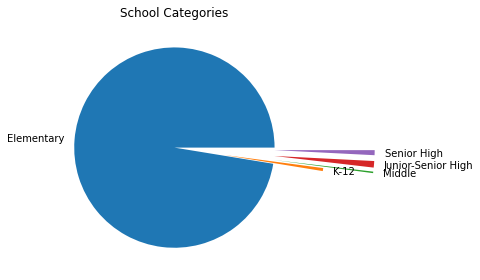

In [69]:
fig1, ax1 = plt.subplots()
sizes = joint.groupby('Grade_Organization_Description').count().iloc[:,0]
explode = (0, .5, 1, 1, 1)
labels = joint['Grade_Organization_Description'].unique()
ax1.pie(sizes, labels= labels, explode=explode)
plt.title('School Categories')
plt.tight_layout();

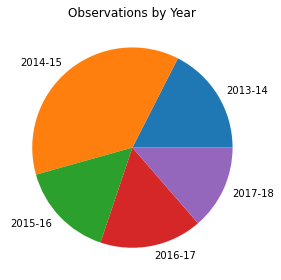

In [132]:
fig1, ax1 = plt.subplots()
sizes = joint.groupby('year').count().iloc[:,0]
labels = joint['year'].unique()
ax1.pie(sizes, labels= labels)
plt.title('Observations by Year')
plt.tight_layout();

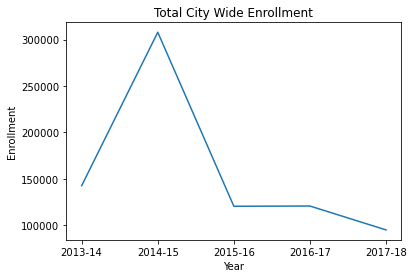

In [134]:
plt.plot(joint['year'].unique(), joint.groupby('year')['total_enrollment'].sum())
plt.title('Total City Wide Enrollment')
plt.ylabel('Enrollment')
plt.xlabel('Year');

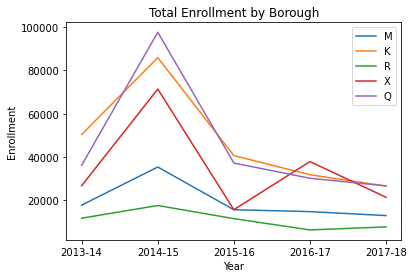

In [135]:
plt.plot(joint[joint['borough2']=='M']['year'].unique(), joint[joint['borough2']=='M'].groupby('year')['total_enrollment'].sum(), label= 'M')
plt.plot(joint[joint['borough2']=='K']['year'].unique(), joint[joint['borough2']=='K'].groupby('year')['total_enrollment'].sum(), label= 'K')
plt.plot(joint[joint['borough2']=='R']['year'].unique(), joint[joint['borough2']=='R'].groupby('year')['total_enrollment'].sum(), label= 'R')
plt.plot(joint[joint['borough2']=='X']['year'].unique(), joint[joint['borough2']=='X'].groupby('year')['total_enrollment'].sum(), label= 'X')
plt.plot(joint[joint['borough2']=='Q']['year'].unique(), joint[joint['borough2']=='Q'].groupby('year')['total_enrollment'].sum(), label= 'Q')
plt.legend()
plt.title('Total Enrollment by Borough')
plt.ylabel('Enrollment')
plt.xlabel('Year');

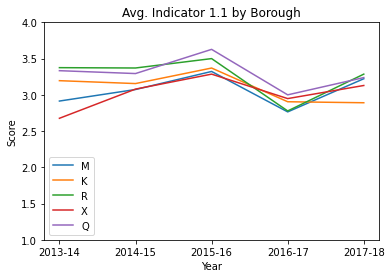

In [139]:
plt.plot(joint[joint['borough2']=='M']['year'].unique(), joint[joint['borough2']=='M'].groupby('year')['Indicator_1_1'].mean(), label= 'M')
plt.plot(joint[joint['borough2']=='K']['year'].unique(), joint[joint['borough2']=='K'].groupby('year')['Indicator_1_1'].mean(), label= 'K')
plt.plot(joint[joint['borough2']=='R']['year'].unique(), joint[joint['borough2']=='R'].groupby('year')['Indicator_1_1'].mean(), label= 'R')
plt.plot(joint[joint['borough2']=='X']['year'].unique(), joint[joint['borough2']=='X'].groupby('year')['Indicator_1_1'].mean(), label= 'X')
plt.plot(joint[joint['borough2']=='Q']['year'].unique(), joint[joint['borough2']=='Q'].groupby('year')['Indicator_1_1'].mean(), label= 'Q')
plt.legend()
plt.title('Avg. Indicator 1.1 by Borough')
plt.ylabel('Score')
plt.xlabel('Year')
plt.ylim(1,4);

# Project Summary
### Goals
The purpose of this project was to successfully collect, clean, and merge three data sets. The data was sourced from a csv file, downloaded from HTML, and queried from an API. Following cleaning and selecting the columns of interest the data was stored in an SQL data base. Then columns were retrieved and merged into a dataframe for further analysis.
### Collecting the Data
Reading data from csv files was something that I have done many times and was pretty straight forward. However, downloading HTML and querying an API were both new experiences. The website I retrieved my HTML table from, stored twenty rows of data on a page and each page was a separate document. There was no clear way to proceed from page to page in a query in order to continuously download all the pages. I ended up downloading and saving each page separately. A loop to open and parse each page was an effective way to collect all the data. Obtaining the data from the API was easy as I did not perform any special query requests. Selecting the data in the query would be something to work on.
### Cleaning the Data
Performing the steps necessary to clean the data provided lots of experience using different techniques. One area I relied on was using regex to find and select the parts of columns to be used. There were cases were the information of interest was contained within a string. Furthermore, using fuzzy matching was a new experience for me. Being able to accurately match data frames by school name even though the names were not exactly the same was very helpful.  
One area I missed in the original cleaning was making the data compatible across data sets. When trying to preform the final merge there were a few issues I discovered. Making sure that all extra information is removed from the column should have been obvious. Checking the data type to make sure the columns are of the same data type is not something I would have thought of.
### SQL
Structured Query Language is something I have seen but never actually used before. The syntax and commands are something that requires more experience to reach proficiency. Storing the data was made easier by using pandas function to convert the data frame to SQL. Retrieving the data required more practice and error until I got it right.  
Creating the visualizations from the merged data sets was a rewarding finish to the project. Seeing the data come together into a finished product was enjoyable.
